### Introduction
### 1. Business Overview
Real Estate Investment Firms provide comprehensive investment advisory services, including market research, property analysis, due diligence, financial modeling, and portfolio management.
Our goal is to optimize investment decisions, mitigate risks, and ensure long-term success.

The primary focus of this project is to identify opportunities in real estate markets and capitalize them to generate significant profits. We will carefully assess and mitigate risks associated with each investment based on some factors like market volatility.
We will conduct a market analysis to identify areas of high demand and growth for optimal investment and prioritize investments with the potential substantial returns based on factors like property appreciation and market demand.

With long term value our investement strategies will focus on the ability to generate consistent cashflows overtime. Real Estate Firms can achieve a long-term partnerships with clients by achieving their financial objectives through successful real estate investments.


### 1. Problem Statement.

At Matawi Real Estate Investment firm we seek to identify the top five areas for potential investment opportunities. The firm aims to maximize return on investment by strategically selecting areas that exhibit strong growth potential and promising real estate market conditions. By leveraging data from Zillow Research, our firm intends to make data-driven investment decisions and optimize investment portfolio.

The investment firm needs to determine the top five areas that present the best investment opportunities based on real estate market trends and historical data. We will conduct a comprehensive analysis of various factors, such as past price trends, growth rates, market demand, and other relevant indicators to identify the areas with the highest potential for future price appreciation.

### 2. Objectives
  main objective: 
 - The main objective is to develop a forecasting model that can accurately predict real estate price movements in different areas and assist in identifying the most favorable locations for investment between the period of April 1996 to April 2018. 

specific objectives: 
-  To assess and mitigate potential risks associated with market volatility and economic fluctuations.
- To Utilize time series analysis techniques to identify underlying patterns, trends, and seasonality in the real estate price data
- To Build a time series predictive model that can forecast real estate prices.
- To Evaluate the forecasting model's performance by comparing its predictions against actual real estate prices
- To forecast house prices in the next subsequent years.

# Success Metrics.
For the success creterion we will use the *" Root mean squared  error "* and measure accuracy of our models. 
We shall be aiming at an RMSE value of between 0.2 and 0.5.
This indicates that we  want the predictions to be reasonably close to the actual values, with an acceptable level of error.

During the model training and evaluation process, you will calculate the RMSE for each model and compare it to your target range. Here's how we would interpret the results:

If the RMSE is below 0.2: This indicates excellent performance, as the predictions have a very small average error compared to the actual values. It suggests that our  model is accurate and reliable.

If the RMSE is between 0.2 and 0.5: This falls within our  target range and suggests that our model is performing well. It means that, on average, the predictions are within a reasonable distance from the actual values.

If the RMSE is above 0.5: This suggests that your model's performance may not be satisfactory. The predictions have a relatively larger average error compared to the actual values. We may need to further improve your model or explore alternative approaches to achieve better accuracy.


### 2. Data Understanding

The dataset used in this project consists of historic median house prices from various regions in the USA. It covers a time period of 22 years, specifically from April 1996 to April 2018. The dataset was obtained from the [Zillow website.](https://www.zillow.com/research/data/)

Here are the key details about the dataset:

* It contains 14,723 rows and 272 columns.
* Out of the 272 columns, 4 columns are categorical, while the rest are numerical.

The columns are described as follows:
> RegionID: A unique identifier for each region.

> RegionName: The names of the regions, represented by zip codes.

> City: The corresponding city names for each region.

> State: The names of the states where the regions are located.

> Metro: The names of the metropolitan areas associated with the regions.

> County Name: The names of the counties where the regions are situated.

> Size Rank: The ranking of the zip codes based on urbanization.

> Date Columns (265 Columns): These columns represent different dates and provide median house prices for each region over the years.

### 3. Data Preparation

In [1]:
# importing the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Previewing the dataset.
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
# A function to analyze the shape, number of columns, and information of the dataset
def analyze_dataset(df):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", df.shape)
    print('\n-----------------------------------------------------------')

    # Output the column names of the dataset
    print("Column names:", list(df.columns))
    print('\n-----------------------------------------------------------')

    # Output information about the dataset
    print(df.info())
    print('\n-----------------------------------------------------------')

    # output descriptive statistics about the dataset
    print(df.describe())
    print('\n-----------------------------------------------------------')



In [4]:
analyze_dataset(df)

Shape of dataset: (14723, 272)

-----------------------------------------------------------
Column names: ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '

The dataset has 14723 rows and 272 columns,4 categorical and the rest are numerical

In [5]:
#Checking for duplicates and missing data
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [6]:
cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

In [7]:
# Creating a dataframe to display datatypes and, the unique values.
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
    ])

pd.DataFrame(data = desc, columns=['Feature','Dtypes','Sample_Unique'])


,Feature,Dtypes,Sample_Unique
0,RegionID,int64,14723
1,RegionName,int64,14723
2,City,object,7554
3,State,object,51
4,Metro,object,701
...,...,...,...
267,2017-12,int64,5248
268,2018-01,int64,5276
269,2018-02,int64,5303
270,2018-03,int64,5332


In [8]:
def missing_values_percentage(df):
    total_missing = df.isnull().sum().sum()
    total_cells = df.size
    percentage_missing = (total_missing / total_cells) * 100
    return percentage_missing

missing_values_percentage(df)

3.943759463983923

The missing values are 3.94% of the entire dataset.Let's preview the percentage of the missing values per column.

In [9]:
missing_values = df.isnull().mean() * 100

# Print the list of columns in the DataFrame along with their missing percentages
for column in missing_values.index:
    print(column, missing_values[column])

RegionID 0.0
RegionName 0.0
City 0.0
State 0.0
Metro 7.084154044691979
CountyName 0.0
SizeRank 0.0
1996-04 7.056985668681655
1996-05 7.056985668681655
1996-06 7.056985668681655
1996-07 7.056985668681655
1996-08 7.056985668681655
1996-09 7.056985668681655
1996-10 7.056985668681655
1996-11 7.056985668681655
1996-12 7.056985668681655
1997-01 7.056985668681655
1997-02 7.056985668681655
1997-03 7.056985668681655
1997-04 7.056985668681655
1997-05 7.056985668681655
1997-06 7.056985668681655
1997-07 7.050193574679074
1997-08 7.050193574679074
1997-09 7.050193574679074
1997-10 7.050193574679074
1997-11 7.050193574679074
1997-12 7.050193574679074
1998-01 7.036609386673912
1998-02 7.036609386673912
1998-03 7.036609386673912
1998-04 7.036609386673912
1998-05 7.036609386673912
1998-06 7.036609386673912
1998-07 7.036609386673912
1998-08 7.036609386673912
1998-09 7.036609386673912
1998-10 7.036609386673912
1998-11 7.036609386673912
1998-12 7.036609386673912
1999-01 7.036609386673912
1999-02 7.0366093

The percentage of the missing values per column is still low ranging from 1%-7% thus we chose to fill the missing values for the metro column with missing then dropping the missing values in the date columns.

In [10]:
## Fill the `metro` column with the word "missing"
df['Metro'].fillna('missing', inplace=True)

## Handling the date columns' missing values
df.dropna(inplace=True)
missing_values_percentage(df)

0.0

In [11]:
print(missing_values_percentage(df))
print(cleaning(df))

0.0
There are '0' missing values and '0' duplicated values in the dataset


The dataset doesn't have any missing values or any duplicates. Since region ID is the unique identifier, let's check if there is any duplicates in that column.

In [12]:
df[df['RegionID'].duplicated(keep=False)]


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


The data doesn't have any duplicated ID.

In [13]:
def check_value_counts(data):
    for column in data.columns:
        print(f'value counts for {column}')
        print(data[column].value_counts())
        print('------------------------------------------','\n')

check_value_counts(df)

value counts for RegionID
84654    1
74304    1
73138    1
81233    1
60685    1
        ..
90754    1
74052    1
67659    1
89247    1
95851    1
Name: RegionID, Length: 13684, dtype: int64
------------------------------------------ 

value counts for RegionName
60657    1
37330    1
34602    1
53128    1
7462     1
        ..
75201    1
36801    1
23324    1
71909    1
89155    1
Name: RegionName, Length: 13684, dtype: int64
------------------------------------------ 

value counts for City
New York               104
Los Angeles             93
Houston                 86
San Antonio             48
Washington              43
                      ... 
Vinings                  1
Hopatcong                1
Proctorville             1
Muncy Creek              1
Mount Crested Butte      1
Name: City, Length: 7046, dtype: int64
------------------------------------------ 

value counts for State
CA    1188
NY     985
TX     944
PA     797
FL     765
OH     529
IL     523
NJ     502
MI     453

89900.0     23
87300.0     22
80500.0     22
85700.0     21
80800.0     21
            ..
351700.0     1
270300.0     1
254600.0     1
170800.0     1
274500.0     1
Name: 1998-09, Length: 2912, dtype: int64
------------------------------------------ 

value counts for 1998-10
88000.0     24
73600.0     24
68600.0     22
82400.0     22
84700.0     21
            ..
198000.0     1
476800.0     1
292100.0     1
246800.0     1
278900.0     1
Name: 1998-10, Length: 2909, dtype: int64
------------------------------------------ 

value counts for 1998-11
72600.0     22
85300.0     22
85500.0     21
77600.0     21
90000.0     20
            ..
336100.0     1
480600.0     1
28100.0      1
314000.0     1
746200.0     1
Name: 1998-11, Length: 2903, dtype: int64
------------------------------------------ 

value counts for 1998-12
84700.0     21
90800.0     21
63800.0     21
88800.0     20
75200.0     19
            ..
304600.0     1
443100.0     1
319800.0     1
386700.0     1
287900.0     1
Name

98700.0     19
88000.0     17
91000.0     17
79100.0     16
128700.0    16
            ..
361100.0     1
440200.0     1
256800.0     1
497300.0     1
401400.0     1
Name: 2002-03, Length: 3737, dtype: int64
------------------------------------------ 

value counts for 2002-04
130300.0     20
78600.0      18
103700.0     16
92900.0      16
87600.0      16
             ..
449100.0      1
618800.0      1
2020800.0     1
291600.0      1
219800.0      1
Name: 2002-04, Length: 3759, dtype: int64
------------------------------------------ 

value counts for 2002-05
130400.0    18
82100.0     17
128800.0    17
79000.0     17
130500.0    16
            ..
401400.0     1
347200.0     1
384000.0     1
286800.0     1
221000.0     1
Name: 2002-05, Length: 3780, dtype: int64
------------------------------------------ 

value counts for 2002-06
87400.0     19
126700.0    19
126600.0    18
79400.0     16
85800.0     16
            ..
603700.0     1
278000.0     1
490100.0     1
582100.0     1
222100.0

value counts for 2006-02
123200.0    15
123900.0    15
98800.0     14
125100.0    14
141400.0    13
            ..
564800.0     1
309600.0     1
510400.0     1
505700.0     1
602300.0     1
Name: 2006-02, Length: 5121, dtype: int64
------------------------------------------ 

value counts for 2006-03
150500.0    16
154800.0    15
122300.0    15
128500.0    14
126600.0    14
            ..
514600.0     1
635000.0     1
575600.0     1
653600.0     1
299300.0     1
Name: 2006-03, Length: 5152, dtype: int64
------------------------------------------ 

value counts for 2006-04
139200.0    16
105300.0    14
93600.0     13
99900.0     13
132000.0    13
            ..
249800.0     1
895200.0     1
608300.0     1
935800.0     1
604900.0     1
Name: 2006-04, Length: 5152, dtype: int64
------------------------------------------ 

value counts for 2006-05
78300.0     13
164700.0    13
178400.0    12
99900.0     12
144900.0    12
            ..
580100.0     1
696900.0     1
639500.0     1
537800.0 

108900.0     16
160600.0     15
113900.0     15
91700.0      15
83300.0      14
             ..
529700.0      1
342100.0      1
333700.0      1
356800.0      1
1432300.0     1
Name: 2009-07, Length: 4390, dtype: int64
------------------------------------------ 

value counts for 2009-08
166000.0    17
84200.0     15
81600.0     15
125800.0    15
144500.0    14
            ..
379500.0     1
144900.0     1
666400.0     1
451600.0     1
634700.0     1
Name: 2009-08, Length: 4393, dtype: int64
------------------------------------------ 

value counts for 2009-09
114400.0    17
113000.0    14
146100.0    14
107300.0    14
88500.0     14
            ..
396000.0     1
453500.0     1
439300.0     1
328100.0     1
322400.0     1
Name: 2009-09, Length: 4348, dtype: int64
------------------------------------------ 

value counts for 2009-10
126700.0     19
137200.0     15
77600.0      15
133200.0     14
88600.0      14
             ..
611200.0      1
1060000.0     1
431400.0      1
323600.0      

124400.0     19
84500.0      18
115800.0     14
131000.0     14
138300.0     13
             ..
1268600.0     1
357200.0      1
413600.0      1
896400.0      1
528400.0      1
Name: 2013-11, Length: 4470, dtype: int64
------------------------------------------ 

value counts for 2013-12
93000.0     16
128100.0    15
139700.0    15
135500.0    14
137900.0    14
            ..
723200.0     1
637800.0     1
495900.0     1
815500.0     1
525200.0     1
Name: 2013-12, Length: 4499, dtype: int64
------------------------------------------ 

value counts for 2014-01
125100.0    18
75700.0     16
80400.0     15
115300.0    14
99600.0     14
            ..
19300.0      1
294600.0     1
444400.0     1
744400.0     1
527100.0     1
Name: 2014-01, Length: 4515, dtype: int64
------------------------------------------ 

value counts for 2014-02
140200.0    18
116300.0    15
126200.0    15
156300.0    14
155100.0    14
            ..
822700.0     1
370900.0     1
315600.0     1
783900.0     1
527400.0

The data doesn't have any data inconsistencies.

### Feature engineering

In [14]:
#rename RegionName column to Zipcode
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)

In [15]:
#convert Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')

In [16]:
print(df.ZipCode.min())

1001


In [17]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits
df['ZipCode'] = df['ZipCode'].str.zfill(5)


In order to address the issues identified in the business understanding phase, two new columns will be generated: one for calculating the return on investment (ROI) and another for determining the coefficient of variation. The coefficient of variation measures the extent of data point dispersion around the mean and indicates the ratio of standard deviation to the mean. This enables investors to evaluate the level of risk involved relative to the ROI.

In [18]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2018-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)


In [19]:
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1.212474,0.232707
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,1.435814,0.303073
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,1.336252,0.182705
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,2.476714,0.282105


## 4. Exploratory Data Analysis

In [20]:
melted_df = df.copy()# creating a copy of the dataset

The original dataset has 265 datetime columns which makes it challenging to do any data analysis and visualization. We'll melt the dataframe so that the dates are in one column and have the values in one column.

In [21]:
def melt_data(df):

    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','ROI','CV'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#.groupby('time').aggregate({'value':'mean'})

melted_df = melt_data(melted_df)
melted_df


,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,2.083782,0.256487,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,0.365295,0.152680,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,0.567966,0.143950,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1.623971,0.237364,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,0.571798,0.178326,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3626255,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.212474,0.232707,2018-04-01,209300.0
3626256,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.435814,0.303073,2018-04-01,225800.0
3626257,40404,75672,14721,Berea,KY,Richmond,Madison,1.336252,0.182705,2018-04-01,133400.0
3626258,81225,93733,14722,Mount Crested Butte,CO,missing,Gunnison,2.476714,0.282105,2018-04-01,664400.0


In [22]:
analyze_dataset(melted_df)

Shape of dataset: (3626260, 11)

-----------------------------------------------------------
Column names: ['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV', 'time', 'value']

-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3626260 entries, 0 to 3626259
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ZipCode     string        
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   ROI         float64       
 8   CV          float64       
 9   time        datetime64[ns]
 10  value       float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), string(1)
memory usage: 304.3+ MB
None

-----------------------------------------------------------
           RegionID      SizeRank    

The new dataset has 3626260 rows and 11 columns.The data is from 4th April 1996 to 4th April 2018.The house with the lowest price has a price of 11300 dollars and the one with the highest price has a price of 8558700 dollars. The highest ROI on a house is 11.2% and the lowest ROI on a house is -53.3%.

### 4.1 Univariate Analysis

In [23]:
def plot_value_counts(data, columns, top_n=20):
    """
    Plots bar plots of value counts for the specified columns in the given dataset,
    considering only the top_n items.
    Parameters:
    data (DataFrame): The dataset to analyze.
    columns (list): List of column names to plot value counts for.
    top_n (int): Number of top items to consider (default: 20).
    """

    num_plots = len(columns)
    num_rows = 2
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.tight_layout()
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        value_counts = data[column].value_counts().head(top_n)
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax)
        ax.set_title(f'Top {top_n} Value Counts of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    # Hide empty subplots if there are any
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row, col])
    plt.tight_layout()
    plt.show()

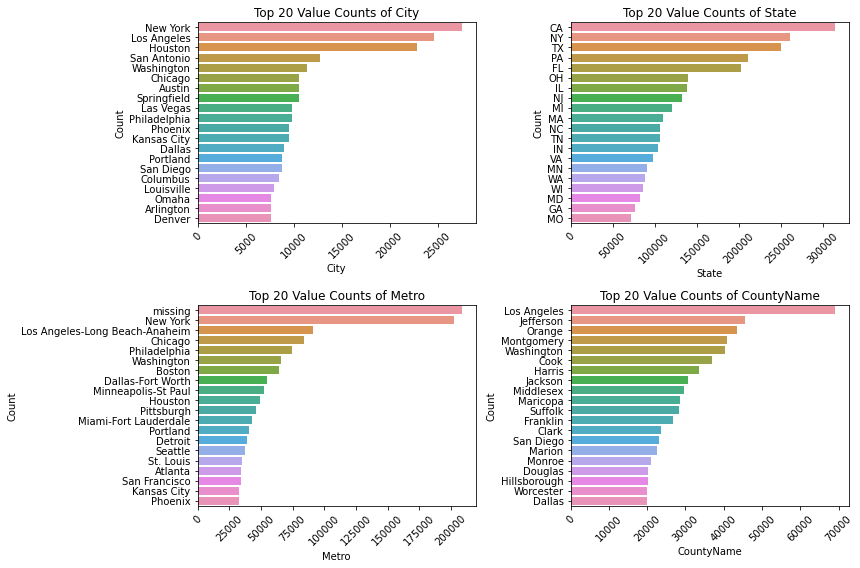

In [24]:
columns_list = ["City","State","Metro","CountyName"]
plot_value_counts(melted_df, columns_list)

The top 5 cities, states metro and counties with the highest number of houses are:
* cities: New York, Los Angeles, Houston, San Antonio and Washington
* states: CA, NY, TX,PA,FL
* metro: New York, Los Angeles, Chicago, Philadelphia, Washington
* counties: Los Angeles,Jefferson, Orange, Washington, Montgomery


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_column_distributions(data, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 2, figsize=(10*2, 6*num_columns))

    for i, column in enumerate(columns):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        # Plot histogram using seaborn
        sns.histplot(data[column], ax=ax1, bins=30, kde=False, edgecolor='black')
        ax1.set_title(f'{column} Distribution (Histogram)', fontsize=16)
        ax1.set_xlabel(column, fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)

        # Plot kernel density plot using seaborn
        sns.kdeplot(data[column], ax=ax2, fill=True)
        ax2.set_title(f'{column} Distribution (Kernel Density Plot)', fontsize=16)
        ax2.set_xlabel(column, fontsize=12)
        ax2.set_ylabel('Density', fontsize=12)

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()


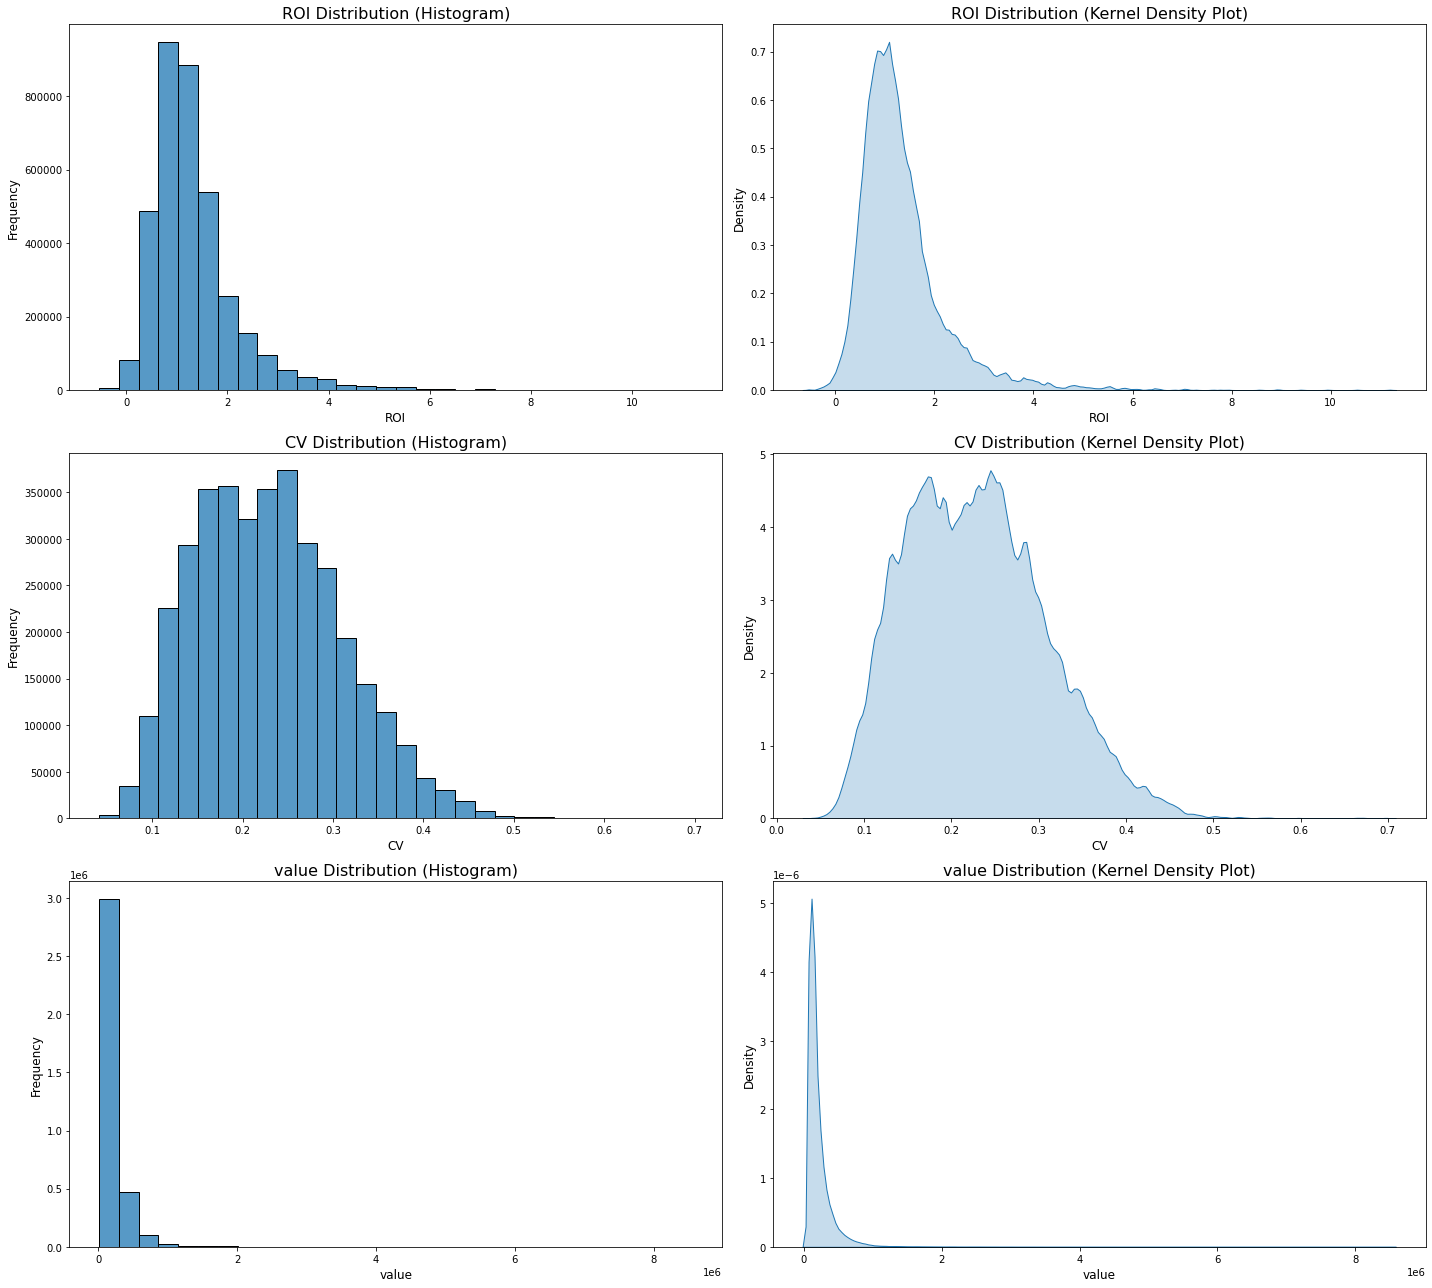

In [26]:
continuous_columns = ['ROI','CV','value']
plot_column_distributions(melted_df, continuous_columns)

> ROI: The distribution is positively skewed.Most of the houses have an ROI between 1% and 2% .It also has a long tail showing that there are outliers, houses with higher ROI impliying higher return.

>Value: The distribution of the house prices is positively skewed showing that most houses are lowly priced and it also has a long tail showing that there are outliers ie the extremely highly priced houses.

> CV:  The plot shows that most of the houses have a cv between 0.1 and 0.3 which shows that their prices are close to the mean thus less risk but it also has a long tail showing that there are outliers, houses with higher cv impliying higher risk.

IQR for RegionID column: 24320.25
Number of outliers in RegionID column: 26765
IQR for SizeRank column: 7260.5
Number of outliers in SizeRank column: 0
IQR for ROI column: 0.8341421408774268
Number of outliers in ROI column: 195040
IQR for CV column: 0.11609651734251925
Number of outliers in CV column: 14575
IQR for value column: 140900.0
Number of outliers in value column: 275048


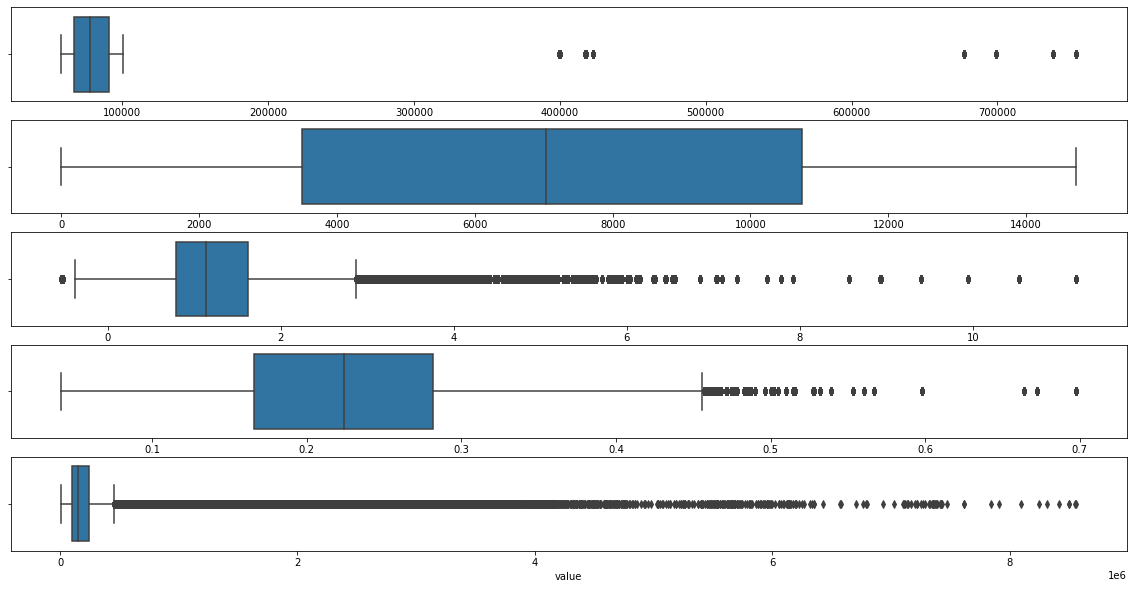

In [27]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,10))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
plt.show()

num=melted_df.select_dtypes('number')
columns=num.columns
check_outliers(melted_df, columns)

The box plots shows that there are outliers in the dataset especially in the prices(value) column which shows there are some houses that are highly priced which might provide useful information for the analysis, thus we won't remove the outliers.

### 4.2 Bivariate Analysis

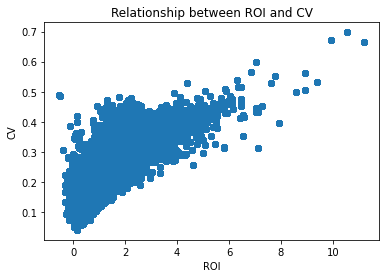

In [28]:
def scatter_plot(x,y, x_label, y_label):
  plt.scatter(x,y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(f'Relationship between {x_label} and {y_label}')
  plt.show();

scatter_plot(melted_df['ROI'],melted_df['CV'],'ROI','CV')

The plot shows the relationship between the return on investment and the coefficient of variation. It shows that the two have a strong positive relationship, that is, that increase in CV leads to increase in ROI and vice versa. This implies that the higher the risk, the higher the return.

Since the two have such a strong relationship, findings using ROI will be similar to those using CV . Let's examine how the other variables are related to ROI.

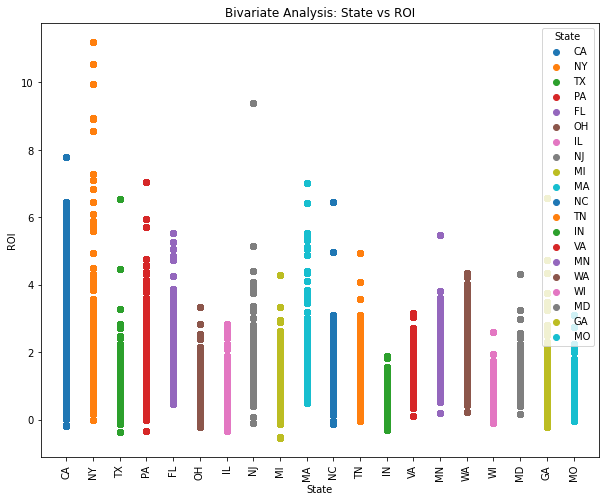

In [29]:
def plot_bivariate_analysis(data, x_column, y_column, top_n=20):

    top_categories = data[x_column].value_counts().nlargest(top_n).index
    data_top = data[data[x_column].isin(top_categories)]

    plt.figure(figsize=(10, 8))
    for category in top_categories:
        category_data = data_top[data_top[x_column] == category]
        plt.scatter(category_data[x_column], category_data[y_column], label=category)

    plt.title(f'Bivariate Analysis: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=90)
    plt.legend(title=x_column)
plt.show()
plot_bivariate_analysis(melted_df, 'State', 'ROI')

The above plot shows that the state with the highest return on investment is NY.

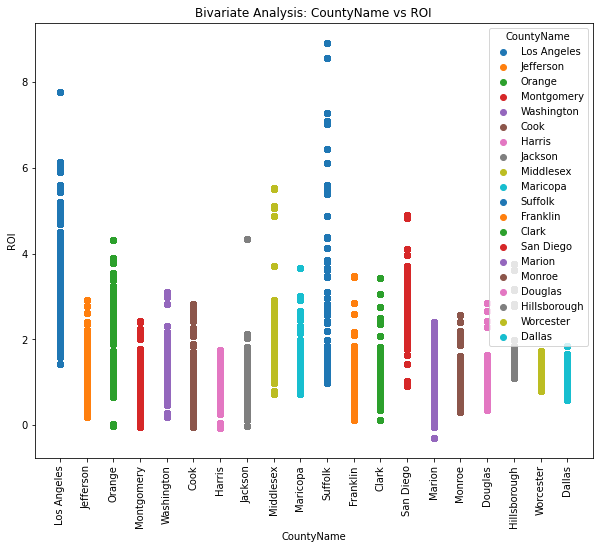

In [30]:
plot_bivariate_analysis(melted_df, 'CountyName', 'ROI')


The county with the highest ROI is Suffolk.

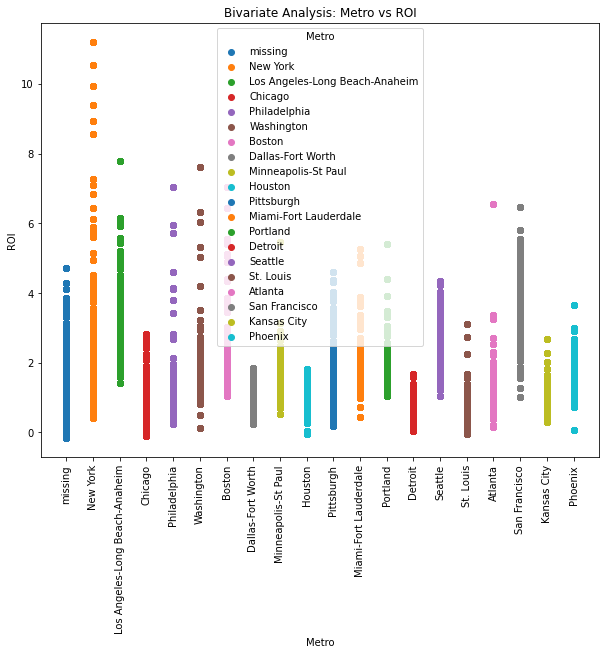

In [31]:
plot_bivariate_analysis(melted_df, 'Metro', 'ROI')

The metro with the highest ROI is New york.

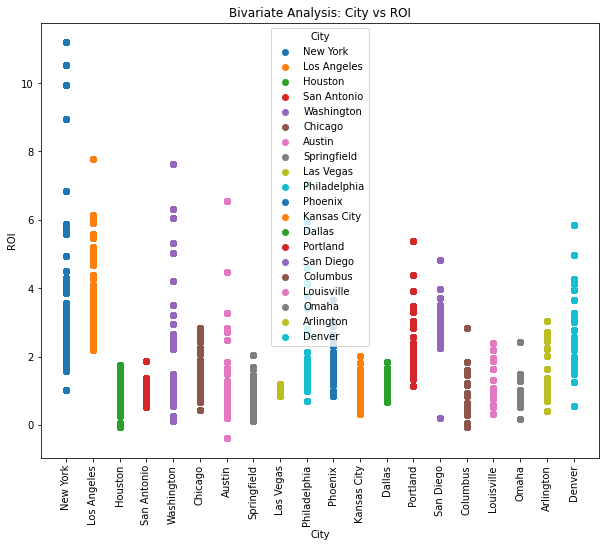

In [32]:
plot_bivariate_analysis(melted_df, 'City', 'ROI')

The city with the highest ROI is NewYork. From the above analysis, we can conclude that properties in NewYork have the highest  return on investment.
Let's analyse the cities, states, metro and counties that have the highest ROI(return) but lowest CV(risk).

In [33]:
def get_top_rows(data, cv_column, roi_column, value_column, num_rows=10000):
    # Sort the DataFrame based on the value column in descending order,
    # coefficient of variance column in ascending order,
    # and return on investment column in descending order
    sorted_data = data.sort_values([value_column, cv_column, roi_column], ascending=[False, True, False])
    # Get the top N rows
    top_rows = sorted_data.head(num_rows)
    return top_rows# Usage example
top_rows = get_top_rows(melted_df, 'CV', 'ROI', 'value', num_rows=10000)


In [34]:
top_rows

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
3174708,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-08-01,8558700.0
3161024,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-07-01,8550800.0
3147340,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-06-01,8501900.0
3188392,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-09-01,8497000.0
3133656,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-05-01,8412600.0
...,...,...,...,...,...,...,...,...,...,...,...
3222545,94507,97715,7000,Alamo,CA,San Francisco,Contra Costa,3.871755,0.325965,2015-11-01,1690000.0
1560851,92037,96602,893,San Diego,CA,San Diego,San Diego,3.410964,0.338853,2005-10-01,1690000.0
3549808,94127,97581,5798,San Francisco,CA,San Francisco,San Francisco,4.228665,0.379145,2017-11-01,1690000.0
2240464,11024,61986,10436,Great Neck,NY,New York,Nassau,2.117189,0.289201,2009-11-01,1689900.0


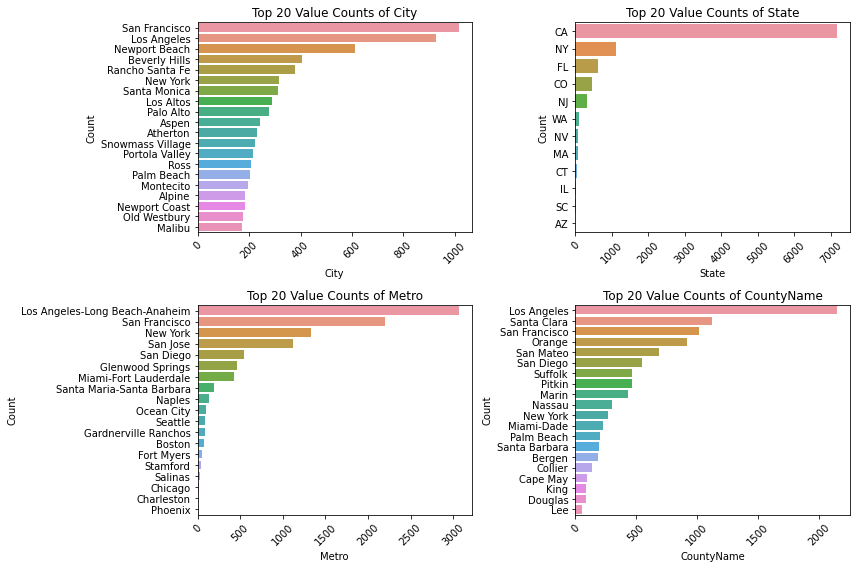

In [35]:
plot_value_counts(top_rows, columns_list)

The top 5 cities, states metro and counties with the highest return and lowest risk are:

* cities: San Fransisco, Los Angeles, Newport beach, Beverly Hills and Rancho Santa Fe
* states: CA, NY,FL, CO, NJ
* metro: Los Angeles,San Fransisco,New York, San Jose, San Diego
* counties: Los Angeles,Santa Clara, San Fransisco, Orange, San Mateo

### Multivariate Analysis

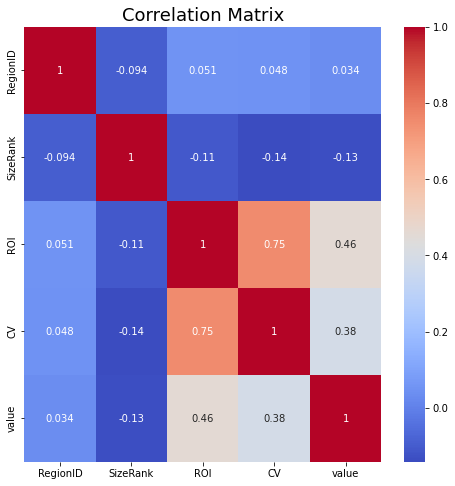

In [36]:
corr_matrix = melted_df.corr()
fig, ax = plt.subplots(figsize=(8,8))

# Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show();


From the heat map, we can observe that most of the features exhibit weak relationships with each other, except for ROI and CV, which display a strong relationship.

## Time series analysis

In [37]:
ts= melted_df[['value', 'time']]
ts['time']=pd.to_datetime(ts['time'])
ts.set_index('time', inplace=True)
ts

,value
time,
1996-04-01,334200.0
1996-04-01,235700.0
1996-04-01,210400.0
1996-04-01,498100.0
1996-04-01,77300.0
...,...
2018-04-01,209300.0
2018-04-01,225800.0
2018-04-01,133400.0


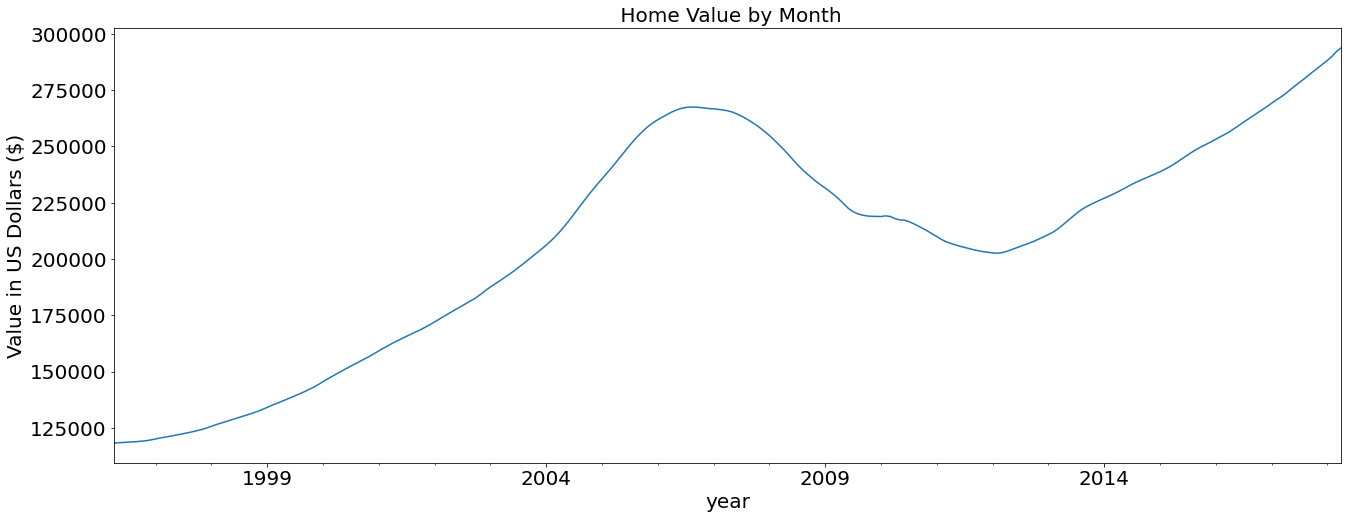

In [38]:
def plot_monthly_time_series(data,col):
    time_series_monthly_value = data.resample('MS').mean()[col]
    time_series_monthly_value.plot(figsize=(22, 8))
    
    plt.title(' Home Value by Month', fontsize=20)
    plt.ylabel('Value in US Dollars ($)', fontsize=20)
    plt.xlabel('year', fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    
    plt.show()

# Call the function with your data
plot_monthly_time_series(ts, 'value')

The plot of the housing prices indicates an overall upward trend from 1996 to around 2007, followed by a downward trend until approximately 2013, and then an upward trend again.

The year 2007 marked the beginning of the global financial crisis, which had a significant impact on the housing market. The crisis was characterized by the bursting of the housing bubble and subsequent financial turmoil, leading to a decline in housing prices in various regions. The downward trend observed until 2013 can be attributed to the aftermath of the crisis, with factors such as reduced demand, stricter lending practices, and general economic uncertainty affecting the housing market negatively.

However, after 2013, the housing market started to stabilize. Measures were taken to address the effects of the  [financial crisis](https://www.sciencedirect.com/science/article/pii/S1572308910000343), and economic conditions began to improve gradually. These improvements, along with factors such as increased consumer confidence, lower interest rates, and a recovery in the overall economy, contributed to the upward trend in housing prices 

In [39]:
# split the data
df = ts.sort_index()

# Calculate the index to split the dataset
split_index = int(0.7 * len(df))

# Split the dataset
train_set = df.iloc[:split_index]
test_set = df.iloc[split_index:]

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 2538382
Test set size: 1087878


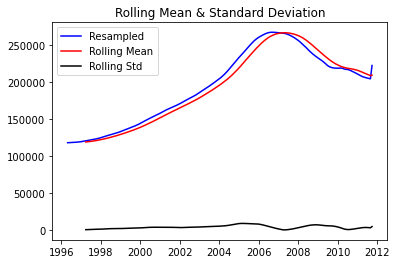

Results of Dickey-Fuller Test:
Test Statistic                  -0.361852
p-value                          0.916276
#Lags Used                       1.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [40]:
train_set= train_set.resample('M').mean().fillna(method='ffill')

def stationarity_check(TS):
    """
    Check the stationarity of a resampled time series using the Dickey-Fuller test and rolling statistics.
    Parameters:
    TS (pandas.Series): the time series to check for stationarity.
    resample_freq (str): the frequency at which to resample the time series, e.g., "D" for daily, "M" for monthly.
    Returns:
    None: prints the Dickey-Fuller test results and the plot of the rolling mean and standard deviation.
    """
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=12).mean()
    roll_std = TS.rolling(window=12).std()
    # Perform the Dickey-Fuller test
    dftest = adfuller(TS)
    # Plot rolling statistics
    plt.plot(TS, color='blue', label='Resampled')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

from statsmodels.tsa.stattools import adfuller

stationarity_check(train_set)


From the above plot we can see that the data is not stationary since the rolling mean is not constant over time. We can confirm this using the adfuller test. The p-value is greater than 0.05 thus we fail to reject the null hypothesis,the data is not stationary.

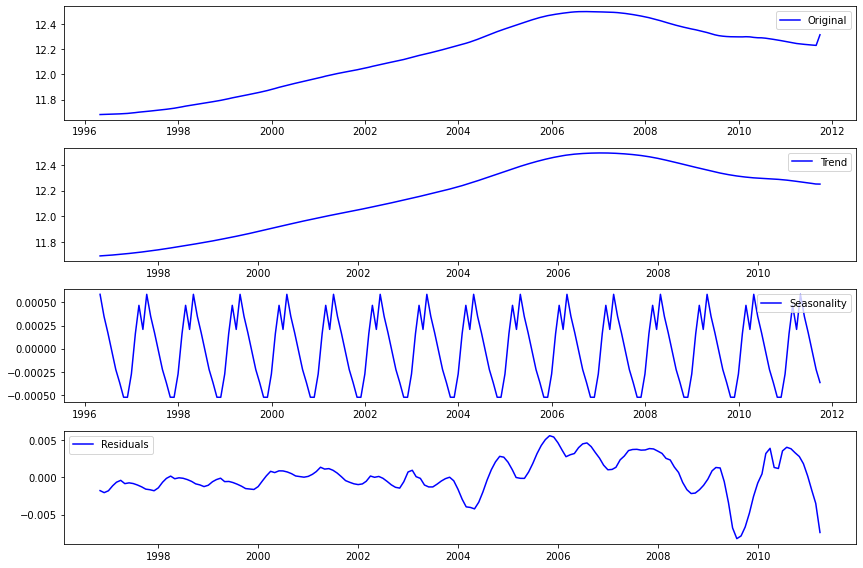

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(train_set),period=12)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(train_set), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

This makes it easier to identify a changing mean or variation in our data. From the decomposition plot it clearly shows an upward trend in our series with seasonality and minimal variation.We will need to detrend our data because if seasonality and trend are part of the time series then there will be effects in the forecast value

### Detrending data

Since our dataset has both the trend and the seasonal component, we'll use differencing to detrend our data since it deals with both seasonality and trend.

In [42]:
def calculate_data_diff(train_set,period):
    data_diff = train_set.diff(periods=period).dropna()
    return stationarity_check(data_diff)

let's check for stationarity to see if the differencing by 1 year makes the data stationary.

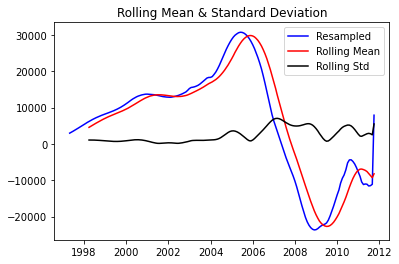

Results of Dickey-Fuller Test:
Test Statistic                  -2.514293
p-value                          0.112035
#Lags Used                      14.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64


In [43]:
calculate_data_diff(train_set,12)

The p value is still greater than 0.05 showing that the data is not stationary.

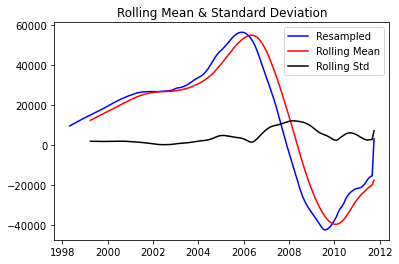

Results of Dickey-Fuller Test:
Test Statistic                  -2.786414
p-value                          0.060241
#Lags Used                       3.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [44]:
calculate_data_diff(train_set,24)

The p value is still greater than 0.05 showing that the data is not stationary.

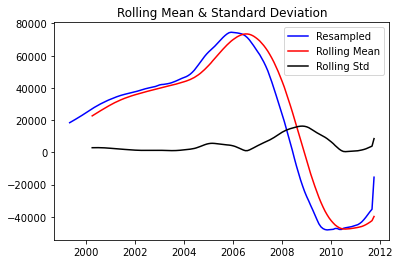

Results of Dickey-Fuller Test:
Test Statistic                  -2.473729
p-value                          0.121998
#Lags Used                       1.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


In [45]:
calculate_data_diff(train_set,36)

The p value is still greater than 0.05 showing that the data is not stationary.

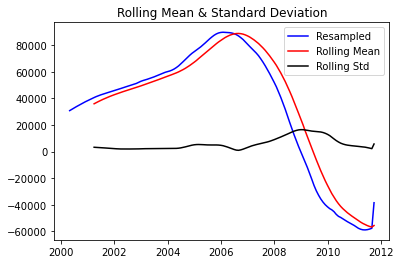

Results of Dickey-Fuller Test:
Test Statistic                  -3.123698
p-value                          0.024848
#Lags Used                       1.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [46]:
calculate_data_diff(train_set,48)

The p value is now less than 0.05 showing that the data is finally stationary.

In [47]:
data_diff = train_set.diff(periods=48).dropna()

### plotting acf and pacf

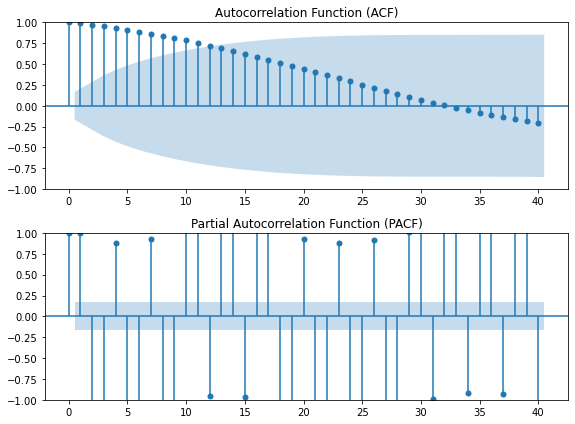

In [48]:
# Plot the PACF
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def plot_acf_pacf(data):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    plot_acf(data, ax=axes[0], lags=40)
    plot_pacf(data, ax=axes[1], lags=40)
    axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12)
    axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_acf_pacf(data_diff)

From the acf plot, lags between 1 and 14 are in the statistically significant region meaning time periods within that span can affect present values. The plot shows a significant peak at a particular lag and decays exponentially afterward suggesting the presence of a seasonal pattern and the presence of an autoregressive (AR) process.

From the pacf plot it  shows significant spikes at multiple lags but decays afterward, it suggests the presence of a mixed autoregressive-moving average (ARMA) process.

From the above we conclude that some of the models we'll fit are AR model and AR(I)MA model.

## Modelling

As seen earlier, the acf plot suggests the presence of an autoregressive (AR) process thus our baseline model will be AR model

In [49]:
ts_standardized = data_diff.copy()
from sklearn.preprocessing import StandardScaler
# Instantiate the StandardScaler
scaler = StandardScaler()

# Select the column to be standardized
column_to_standardize = 'value'

# Standardize the selected column
ts_standardized[column_to_standardize] = scaler.fit_transform(ts_standardized[[column_to_standardize]])
ts_standardized 

,value
time,
2000-04-30,-0.061304
2000-05-31,-0.039702
2000-06-30,-0.018556
2000-07-31,0.002130
2000-08-31,0.022181
...,...
2011-05-31,-1.963085
2011-06-30,-1.959032
2011-07-31,-1.949783


### AR Model

In [50]:
train_values = ts_standardized['value']

# Define the order of the autoregressive model
order = 1
from statsmodels.tsa.ar_model import AutoReg

# Fit the autoregressive model
model = AutoReg(train_values, order)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                  138
Model:                     AutoReg(1)   Log Likelihood                 207.076
Method:               Conditional MLE   S.D. of innovations              0.053
Date:                Wed, 21 Jun 2023   AIC                           -408.151
Time:                        14:51:19   BIC                           -399.391
Sample:                    05-31-2000   HQIC                          -404.591
                         - 09-30-2011                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.005     -2.368      0.018      -0.020      -0.002
value.L1       1.0072      0.005    219.782      0.000       0.998       1.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9928           +0.0000j            0.9928            0.0000
-----------------------------------------------------------------------------
"""

### ARMA 1 1

In [51]:
# Fit an ARMA model
from statsmodels.tsa.arima.model import ARIMA

mod_arma = ARIMA(train_values, order=(1,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  138
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 243.435
Date:                Wed, 21 Jun 2023   AIC                           -478.870
Time:                        14:51:20   BIC                           -467.161
Sample:                    04-30-2000   HQIC                          -474.112
                         - 09-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4580      1.779     -0.258      0.797      -3.944       3.028
ar.L1          0.9953      0.012     81.577      0.000       0.971       1.019
ma.L1          0.9745      0.125      7.811      0.0

Between AR(1) and ARMA(1,1), ARMA(1,1) has the lowest AIC AND BIC. Let's use auto arima to determine the best order.

In [52]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train_values, start_p=1, d=0, start_q=1,
                            max_p=10, max_d=0, max_q = 13,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False, suppress_warning=True)
stepwise_model.fit(train_values)
order = stepwise_model.order
print("Order (p, d, q):", order)

Order (p, d, q): (2, 0, 0)


In [53]:
mod_arma = ARIMA(train_values, order=(2, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  138
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 257.354
Date:                Wed, 21 Jun 2023   AIC                           -506.708
Time:                        14:51:50   BIC                           -494.999
Sample:                    04-30-2000   HQIC                          -501.950
                         - 09-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.6389    217.535     -0.339      0.735    -500.000     352.722
ar.L1          1.9995      0.001   2346.270      0.000       1.998       2.001
ar.L2         -0.9995      0.001  -1097.248      0.0

### SARIMA

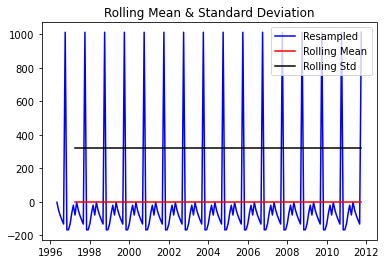

Results of Dickey-Fuller Test:
Test Statistic                -1.045709e+15
p-value                        0.000000e+00
#Lags Used                     1.300000e+01
Number of Observations Used    1.720000e+02
Critical Value (1%)           -3.468952e+00
Critical Value (5%)           -2.878495e+00
Critical Value (10%)          -2.575809e+00
dtype: float64


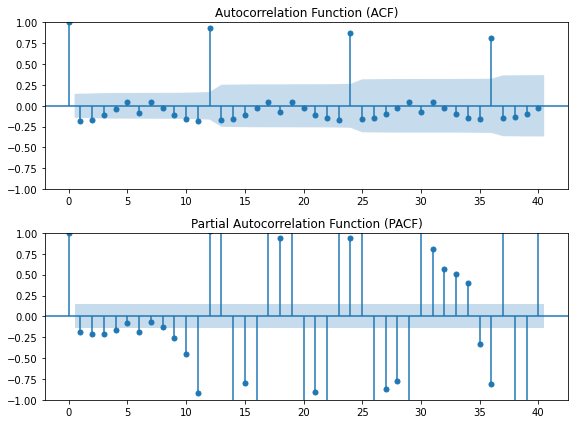

In [54]:
result = seasonal_decompose(train_set, model='additive',extrapolate_trend='freq')
seasonal = result.seasonal
stationarity_check(seasonal)
plot_acf_pacf(seasonal)

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_seasonal = SARIMAX(train_values, order=(4,0,2), seasonal_order=(4,0,2,12))
model_fit_seaonal = model_seasonal.fit()
model_fit_seaonal.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37396D+02    |proj g|=  2.60519D+04

At iterate    5    f= -1.36665D+00    |proj g|=  3.18584D+00

At iterate   10    f= -1.38366D+00    |proj g|=  2.57731D+00

At iterate   15    f= -1.44852D+00    |proj g|=  3.51602D-01

At iterate   20    f= -1.49502D+00    |proj g|=  5.54629D+00

At iterate   25    f= -1.66779D+00    |proj g|=  1.95198D+00

At iterate   30    f= -1.75378D+00    |proj g|=  7.21017D+00

At iterate   35    f= -1.80744D+00    |proj g|=  1.00709D+00

At iterate   40    f= -1.85695D+00    |proj g|=  2.75320D+00

At iterate   45    f= -1.89530D+00    |proj g|=  5.09486D-02

At iterate   50    f= -1.92044D+00    |proj g|=  1.02947D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

/home/paul/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  138
Model:             SARIMAX(4, 0, 2)x(4, 0, 2, 12)   Log Likelihood                 265.021
Date:                            Wed, 21 Jun 2023   AIC                           -504.042
Time:                                    14:52:30   BIC                           -465.987
Sample:                                04-30-2000   HQIC                          -488.577
                                     - 09-30-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1056      6.055      0.017      0.986     -11.762      11.973
ar.L2          1.4328      8.508      0.168      0.866     -15.243      18.108
ar.L3          0.2525      9.157      0.028      0.978     -17.696      18.201
ar.L4         -0.7989      5.432     -0.147      0.883     -11.446       9.848
ma.L1          1.7283      6.517      0.265      0.791     -11.044      14.501
ma.L2          0.9005      7.692      0.117      0.907     -14.176      15.977
ar.S.L12       0.1863    172.806      0.001      0.999    -338.508     338.881
ar.S.L24       0.1661    138.072      0.001      0.999    -270.450     270.783
ar.S.L36      -0.2001     47.671     -0.004      0.997     -93.633      93.233
ar.S.L48      -0.0578      9.750     -0.006      0.995     -19.168      19.052
ma.S.L12      -0.0258    174.105     -0.000      1.000    -341.266     341.215
ma.S.L24      -0.3387    110.391     -0.003      0.998    -216.700     216.023
sigma2         0.0011      0.000      5.918      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             86882.57
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):             332.21   Skew:                            10.82
Prob(H) (two-sided):                  0.00   Kurtosis:                       124.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Evaluation of Models

Our success metric is the Root Mean Squared Error.

In [68]:
from sklearn.metrics import mean_squared_error

#test= test_set.resample('M').mean().fillna(method='ffill')
test_scaled = scaler.transform(test_set)
def check_rmse(model, test_set):
  n_test = test_set.shape[0]
  pred = model.forecast(steps=n_test)
  rmse = np.sqrt(mean_squared_error(test_set, pred))
  return np.round(rmse, 4)

check_rmse(model_fit_seaonal, test_scaled)## sarima model


3.9197

In [69]:
check_rmse(res_arma, test_scaled)## arma model

7.5887

In [70]:
check_rmse(model_fit, test_scaled)## arma model

7.1014

### conclusion for the rmse

The AIC provides a measure of model complexity, the RMSE assesses predictive accuracy. The SARIMA model exhibits a lower RMSE despite a higher AIC, it indicates improved forecasting performance and can be considered the better model.

### Forecascting

In [59]:
def plot_forecast(data_diff, results, steps):
    # Get the forecast
    pred_fut = results.get_forecast(steps=steps)
    # Get confidence intervals of forecasts
    pred_ci = pred_fut.conf_int()
    # Create the plot
    ax = data_diff.plot(label='Observed', figsize=(15, 8))
    pred_fut.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
    # Adjust the title based on the steps parameter
    years = int(steps / 12)
    ax.set_title(f'House Values in {years} Years Time')
    # Set the labels for x and y axes
    ax.set_xlabel('Date')
    ax.set_ylabel('Amount')
    # Display the legend and show the plot
    plt.legend()
    plt.show()

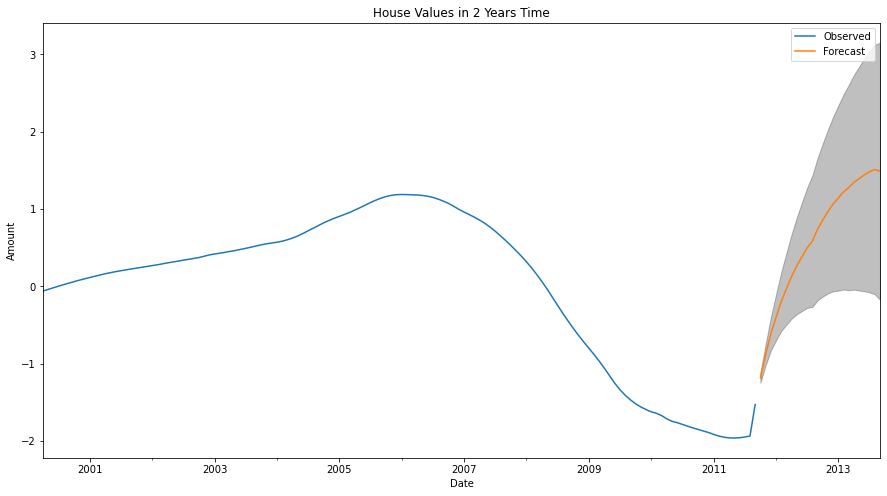

In [60]:
plot_forecast(train_values, model_fit_seaonal, 24)

The model predicts a high increment in the house prices in the next 2 years

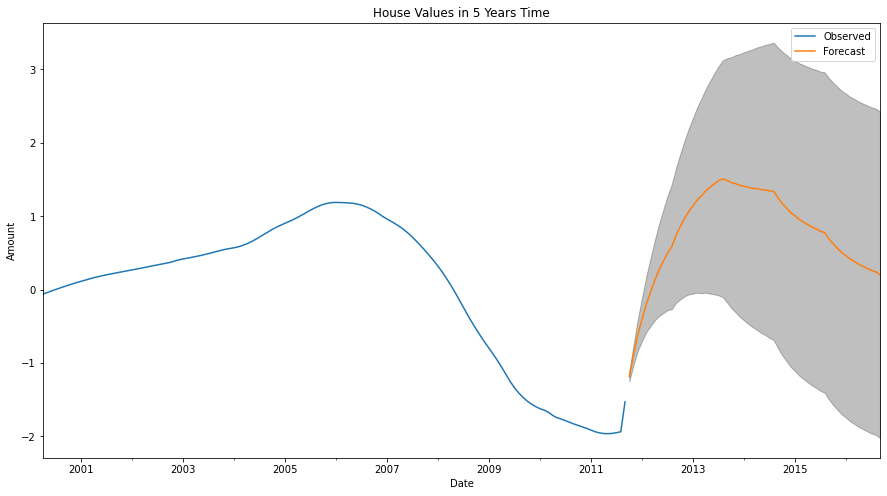

In [61]:
plot_forecast(train_values, model_fit_seaonal, 60)

The model predicts a high increment in the house prices in the next 2 years followed by a decrement in the next subsequent years.

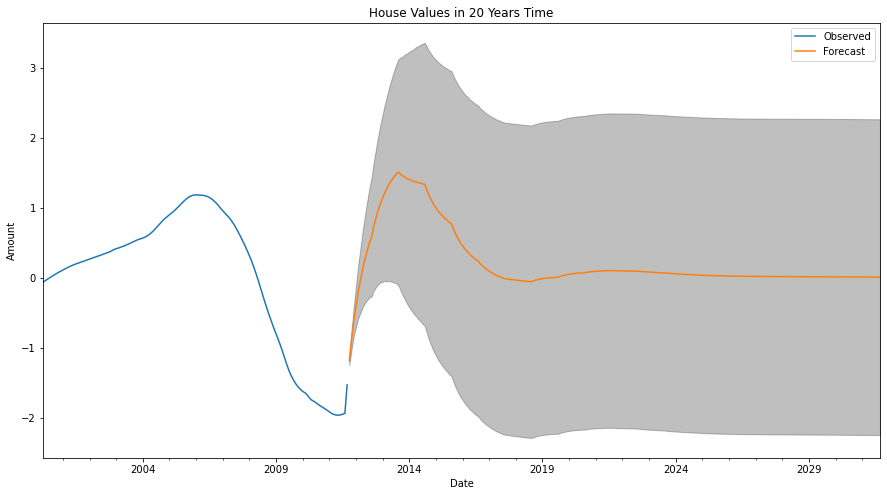

In [62]:
plot_forecast(train_values, model_fit_seaonal, 240)

The model predicts a high increment in the house prices in the next 2 years followed by a gradual decrement in the next 4 years, the house prices stablizes in the next susequent years.

### Conclusion 

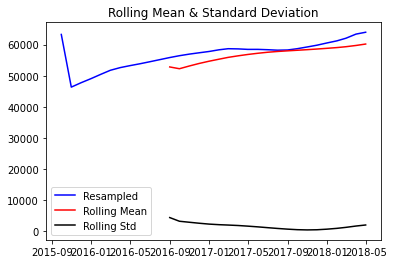

Results of Dickey-Fuller Test:
Test Statistic                 -0.860455
p-value                         0.800716
#Lags Used                      6.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [64]:
test_set= test_set.resample('M').mean().fillna(method='ffill')
calculate_data_diff(test_set,48)